<a href="https://colab.research.google.com/github/BitnooriLee/Into-Data-Science-and-AI/blob/main/Assignment_7_NN_Bitnoori_Lee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 7: Neural Networks using Keras and Tensorflow 

##**Group 53 Bitnoori Lee **

##Work hours : Bitnoori Lee (22hours) 

In [ ]:
# imports
from __future__ import print_function
import keras
from keras import utils as np_utils
import tensorflow
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import tensorflow as tf
from matplotlib import pyplot as plt

In [ ]:
# Hyper-parameters data-loading and formatting

batch_size = 128
num_classes = 10
epochs = 10

img_rows, img_cols = 28, 28

(x_train, lbl_train), (x_test, lbl_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

**Preprocessing**

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = keras.utils.np_utils.to_categorical(lbl_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(lbl_test, num_classes)


#Problem 1. Preprocessing
In the notebook, the data is downloaded from an external server imported into the notebook
environment using the mnist.load_data() function call.
Explain the data pre-processing high-lighted in the notebook.


# Answer

With mnist.load_data(), we load MNIST data load and the function returns two pairs: the input and output data of the training and test set, respectively. These data are all 28x28 grayscale images (represented as a 28x28 matrix). x_train and x_test contain a numerical representation of the data, in which each element is each pixel. 

A few steps of preprocessing needs before applying the Neural Networks.
First, we modify the data type of a NumPy array(x_train and x_test), and use the astype method which copy of the array, and cast to a specified type, float32 in this case. 

Secondly, a rescaling of the pixel values needs. Instead of ranging from 0 to 255 (255: white, 0: black), they will be rescaled in the range between 0 and 1. The reason for this transformation is to make it easier and much faster for CNN to learn if the feature values aren't too big. After rescaling, the number represents the percentage of white. 

In addition, we create y_train and y_test by converting a class vector (integers) to a binary class matrix using the to_categorical function, and the data type is float32 by setting dtype. lbl_train and lbl_test are array-like with class values to be converted into a matrix, which means that they contain correct integers. the index stored in y_train and y_test represents the value. for example, y = [0,0,0,0,1,00...00] means the value 4. 


In [ ]:

## Define model ##
model = Sequential()

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1),
        metrics=['accuracy'],)

fit_info = model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

Epoch 1/10
469/469 [==============================] - 3s 6ms/step - loss: 0.4760 - accuracy: 0.8645 - val_loss: 0.2791 - val_accuracy: 0.9191
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2312 - accuracy: 0.9323 - val_loss: 0.1881 - val_accuracy: 0.9456
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1758 - accuracy: 0.9490 - val_loss: 0.1466 - val_accuracy: 0.9563
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1429 - accuracy: 0.9579 - val_loss: 0.1403 - val_accuracy: 0.9571
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1212 - accuracy: 0.9635 - val_loss: 0.1137 - val_accuracy: 0.9667
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1060 - accuracy: 0.9678 - val_loss: 0.1131 - val_accuracy: 0.9667
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0942 - accuracy: 0.9719 - val_loss: 0.1100 - val_accuracy: 0.9664
Epoch 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


# Problem 2.Network model, training, and changing hyper-parameters.

#Answer
##A) 
###How many layers does the network in the notebook have? 
We use the Sequential model, which means that we merely need to describe our layers in sequence. there are 4 layers in the network: we start with one input layer and then call 2 hidden layers(ReLU activation) followed by output layer(softmax activation) with add() method.


###How many neurons does each layer have? 
1. Input Layer: 28x28 = 784 neurons
2. Hidden layer 1: 64 neurons
3. Hidden layer 1: 64 neurons
4. Output Layer: 10 neurons (num_classes) 
The number of neurons in the input layers is 28x28, as the data represented as a 28x28 matrix. The Number of neurons are setted by Keras dense layer parameters 'unit' that is positive integer as it value and represents the output size of the layer. 

We can double check the number of layers and neurons using summary in the column Layer and Output Shape respectively. 

###What activation functions and why are these appropriate for this pplication? 

ReLu used in the two hidden layers and softmax used in the output layer as the activation function. 

ReLu applies the rectified linear unit activation function, as ReLU activation: max(x, 0), the element-wise maximum of 0 and the input tensor. That as a node will be activated if the value is greater than 0. ReLu is apropriate for the application because of its advantages over sigmoid. For example, ReLu is faster to compute than the sigmoid function, and its derivative is faster to compute. This makes a considerable difference in training and inference time for neural networks. 

On the other hand, softmax converts a vector of values into a probability distribution whicn means the elements(neurons) of the output vector are in range (0,1) and sum to 1. Softmax is used as the activation for the last layer of a classification network because the result could be interpreted as a probability distribution like in this case. Not only that, softmax is appropriate because categorial crossentropy is used as a loss function as it modifies the output to fit the properties required in the loss function. 


Source : https://keras.io/api/layers/activations/

###What is the total number of parameters for the network? 

The total number of parameters for the network is 55050. 
As the number of weight parameters: 784x64+64x64+64x10=54912
and number of biases: 64+64+10=138. 

54912 + 138 = 55050. 

We can double check the total number of parameters for the networkusing summary in 'Total params'. 

###Why does the input and output layers have the dimensions they have?

The dimension of the input layer is 784(28x28) because each neuron represents each pixel in the image and there are 784 pixels on all images. On the other hand, the output layer has 10 dimensions because it represents the number 0,1,2,3,4,5,6,7,8,9 to indicate which integer the image denotes.

##B) 
###What loss-function is used to train the network? 
The categorical crossentropy is used in the network. 

###What is the functional form (mathematical expression) of the loss function? ann how should we interpret it? 
The mathematical expession of the categorical crossentropy is
   \begin{align}
        Loss =  - \sum_{i=1}^{output size} y_i \cdot \log\hat{y_i}
    \end{align}
where where \hat{y_i} is the i-th scalar value in the model output, y_i is the corresponding target value, and output size is the number of scalar values in the model output. This loss is a very good measure of how distinguishable two discrete probability distributions are from each other. In this context, y_i is the probability that event i occurs and the sum of all y_i is 1, meaning that exactly one event may occur.
The minus sign ensures that the loss gets smaller when the distributions get closer to each other.

###Why is it appropriate for the problem at hand?

The categorical crossentropy is nicely suitable for classification tasks since one example can be considered to belong to a specific category with probability 1, and to other categories with probability 0. In the network, the model uses categorical crossentropy to learn to give a high probability to the correct digit and a low probability to the other digits.

Source: https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/loss-functions/categorical-crossentropy

##C)

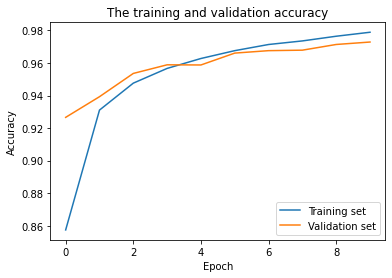

In [ ]:

plt.plot(fit_info.history['accuracy'])
plt.plot(fit_info.history['val_accuracy'])
plt.title('The training and validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='lower right')
plt.show()

What can be seen in the training and validation accuracy plot above, the accuracy is greatly improved in the first epochs and slowly converged as the number of epochs increases. We can assume that an even higher number of epochs can improve the accuracy however, it would not that significant.

##D)

In [ ]:
from tensorflow.keras import regularizers
import numpy as np

epochs = 40
repeat = 3
regularization_factors = np.linspace(0.000001, 0.001, 5) #select 5 regularization factors from 0.000001 to 0.001 with the same interval 
print('regularization_factors:', regularization_factors)

accuracies = {}
for factor in regularization_factors:
    regularizer = regularizers.l2(factor)
    print('Training models with regularization factor:',factor)

    accuracies[factor] = []

    for re in range(repeat):
        ## Define model ##
        model = Sequential()
        model.add(Flatten(input_shape=(28, 28)))
        model.add(Dense(500, activation='relu', kernel_regularizer=regularizer))
        model.add(Dense(300, activation='relu')) #the hidden-layers has 500 and 300 hidden units 
        model.add(Dense(num_classes, activation='softmax'))
        model.compile(
            loss=keras.losses.categorical_crossentropy,
            optimizer=tensorflow.keras.optimizers.SGD(learning_rate=0.1),
            metrics=["accuracy"],
        )


        fit = fit_info = model.fit(
            x_train,
            y_train,
            batch_size=batch_size,
            epochs=epochs,
            verbose=0,
            validation_data=(x_test, y_test),
  
        )
        
        accuracies[factor].append(np.max(fit.history.get('val_accuracy'))) #accuracies of each repeation for the regularization factor
  

regularization_factors: [1.0000e-06 2.5075e-04 5.0050e-04 7.5025e-04 1.0000e-03]
Training models with regularization factor: 1e-06
Training models with regularization factor: 0.00025075000000000005
Training models with regularization factor: 0.0005005000000000001
Training models with regularization factor: 0.0007502500000000002
Training models with regularization factor: 0.001


In [ ]:
display(accuracies)


{1e-06: [0.9829000234603882, 0.983299970626831, 0.9818999767303467],
 0.00025075000000000005: [0.9835000038146973,
  0.9829999804496765,
  0.9836999773979187],
 0.0005005000000000001: [0.9839000105857849,
  0.9825999736785889,
  0.9830999970436096],
 0.0007502500000000002: [0.983299970626831,
  0.9822999835014343,
  0.9836000204086304],
 0.001: [0.984000027179718, 0.983299970626831, 0.9837999939918518]}

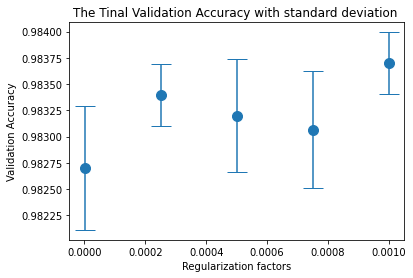

Maximal validation accuracy:  0.9836999972661337
Difference in validation accuracy is:  0.0010000027338663564 where Hilton validation accuracy 0.987.


In [ ]:

mean = np.array([np.mean(accuracy) for accuracy in accuracies.values()])
std = np.array([np.std(accuracy) for accuracy in accuracies.values()])


plt.scatter(regularization_factors, mean)
plt.xlabel("Regularization factors")
plt.ylabel("Validation Accuracy")
plt.title("The Tinal Validation Accuracy with standard deviation ")
plt.errorbar(regularization_factors, mean, std, linestyle='None', fmt='o', markersize= 10, capsize = 10)
plt.show()

print("Maximal validation accuracy: ", np.max(mean))  #best validation accuracy
print("Difference in validation accuracy is: ", 0.9847 - np.max(mean), "where Hilton validation accuracy 0.987.")

By using regularizers, penalties were applied to layer parameters or layer activity during optimization. These penalties are summed into the loss function that the network optimizes. As the graph above shows, the validation accuracy is improved up to a certain regularization factor value alongside with standard deviation. So we could say that the model is overfitting. 
The best validation accuracy achieve here is 0.9829 which is lower than Geoff Hinton's and the possible reasons are related to information not given by Hinton that might influence model training. To be specific, using different learning rates, the number of epochs, and/or batch size might affect the accuracy. Not only that, choosing the regularization factor might affect the accuracy. As we see in the graph above, the accuracy differs according to the regularization factor without trend. We only tested 5 different regularization factors in this case, it might be not enough to hit the case of the best accuracy. 

# Problem 3. Convolutional layers

##A) 


In [ ]:
from tensorflow.keras import regularizers

regularizer = regularizers.l2(0.001)

##Best Model with accuracy: 0.9902999997138977

In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Conv2D(64,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizer))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer=tensorflow.keras.optimizers.SGD(learning_rate=0.1),
    metrics=["accuracy"],
)

fit = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=40,
    verbose=0,
    validation_data=(x_test, y_test),
    
)
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Test loss: {}, Test accuracy {}".format(loss, accuracy))

Test loss: 0.04760131984949112, Test accuracy 0.9902999997138977


In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Conv2D(64,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizer))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer=tensorflow.keras.optimizers.SGD(learning_rate=0.1),
    metrics=["accuracy"],
)

fit = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=40,
    verbose=0,
    validation_data=(x_test, y_test),    
)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1209576427936554
Test accuracy: 0.9703999757766724


In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizer))
model.add(Dense(num_classes, activation='softmax'))
model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer=tensorflow.keras.optimizers.SGD(learning_rate=0.1),
    metrics=["accuracy"],
)

fit = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=10,
    verbose=0,
    validation_data=(x_test, y_test),    
)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.10905268788337708
Test accuracy: 0.9846000075340271


In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.25))
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizer))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))
model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer=tensorflow.keras.optimizers.SGD(learning_rate=0.1),
    metrics=["accuracy"],
)

fit = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=10,
    verbose=0,
    validation_data=(x_test, y_test),    
)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.10387372970581055
Test accuracy: 0.988099992275238


In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.5))
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizer))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer=tensorflow.keras.optimizers.SGD(learning_rate=0.1),
    metrics=["accuracy"],
)

fit = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=10,
    verbose=0,
    validation_data=(x_test, y_test),    
)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

###Design a model that makes use of at least one convolutional layer – how performant a model can you get? -- According to the MNIST database it should be possible reach to 99% accuracy on the validation data. If you choose to use any layers apart from convolutional layers and layers that you used in previous questions, you must describe what they do. If you do not reach 99% accuracy,report your best performance and explain your attempts and thought process.


To achieve high or even 99% accuracy on the validation data, we try different layers including convolution layers in the model. 
First of all, two convolution layers (32 and 64) and two max pooling layers. For convolution layers, we choose 3x3 kernel size, and pool size 2x2 for the max pooling layer and apply different strides. Max pooling layers reduce the computational time by downsampling the input.
Because we observe overfitting in the previous problems, we use the dropout layer as well. The function of the layer is to deactivate some neurons randomly and resolve the overfitting issue. we try different frequencies for the dropout to find best the accuracy. 


##B) 

###Discuss the differences and potential benefits of using convolutional layers over fully connected ones for the particular application?


We can discuss the differences between convolutional layers and fully connected ones in terms of the model architecture and the results(accuracy).
A fully connected neural network consists of a sequence of fully connected layers that connect every neuron in each layer to every neuron in the other layer and there are no particular assumptions needed to be made about the input. However, CNN architectures make the precise assumption that the inputs are images, which allows encoding specific properties into the model architecture. 
Although fully connected networks don't make any assumptions about the input they tend to perform less so that they aren’t suitable for feature extraction. Not only that, they have a higher number of weights to train which results in high training time. On the other hand, CNNs have the benefit that it extracts the best features from the images for the problem at hand with relatively fewer parameters to train. Because CNNs are good at detecting patterns. It could potentially find patterns by transforming the picture in the handwriting images for example edges, circle before turning it into a one-dimensional array. It could potentially increase the accuracy of the model. Long story short, CNNS automatically detects the important features without any human supervision and learns distinctive features for each class by itself. CNN is also computationally more efficient than fully connected ones.







source: https://medium.com/swlh/fully-connected-vs-convolutional-neural-networks-813ca7bc6ee5

# Problem 4. Auto-Encoder for denoising


#Answer


#A)
###The notebook implements a simple denoising deep autoencoder model. Explain what the model does: use the data-preparation and model definition code to explain how the goal of the model is achieved. 

The goal of the model is to remove noise by compressing and decompressing. 
In the salt_and_pepper function, noise is added to the x_train and x_test data sets. The function randomly set a few pixels to black or white by binominal distribution. The encoder and decoder functions are each fully-connected neural layers. The encoder function uses a ReLU activation function, while the decoder function uses a sigmoid activation function. The encoder layer encodes the input image as a compressed representation in a reduced dimension. On the other hand, the decoder layer decodes the encoded image back to the original dimension. The decoded image is a lossy reconstruction of the original image.
In our example, the compressed image has a dimension of 128. The encoder model reduces the dimension from the original 784-dimensional vector to the encoded 128-dimensional vector. And then the compressed images are passed to the next layer with the dimension of 96(latent_dim). The decoder model restores the dimension from the encoded 128-dimensional representation back to the original 784-dimensional vector. The compression factor is the ratio of the input dimension to the encoded dimension. In this , the factor is 6.125 = 784 / 128.
The autoencoder model maps an input image to its reconstructed image. To work with the images as vectors, reshape is needed the images into vectors of length 784. 
During dimension reduction, the features of the images are stored as vectors in the latent space and when reconstructing them, the noise is removed by the decoder. with this process, the simple denoising deep autoencoder model achieves the goal that by removing all the noise in the images to identify digits.  

###Explain the role of the loss function? 

The purpose of the loss function is to reconstruct an image similar to the input image. binary_crossentropy is applied as a loss function here and the model will be trained to minimize the reconstruction loss. Therefore, the loss function makes the autoencoder correspond to the decoded image from the original input image as much as possible.  


###Draw a diagram of the model and include it in your report. 





In [ ]:
![](https://drive.google.com/open?id=1ymZ19svAOaoe-JUm1YkkSPFeZ8VG9p8s)


/bin/bash: -c: line 0: syntax error near unexpected token `https://drive.google.com/open?id=1ymZ19svAOaoe-JUm1YkkSPFeZ8VG9p8s'
/bin/bash: -c: line 0: `[](https://drive.google.com/open?id=1ymZ19svAOaoe-JUm1YkkSPFeZ8VG9p8s)'


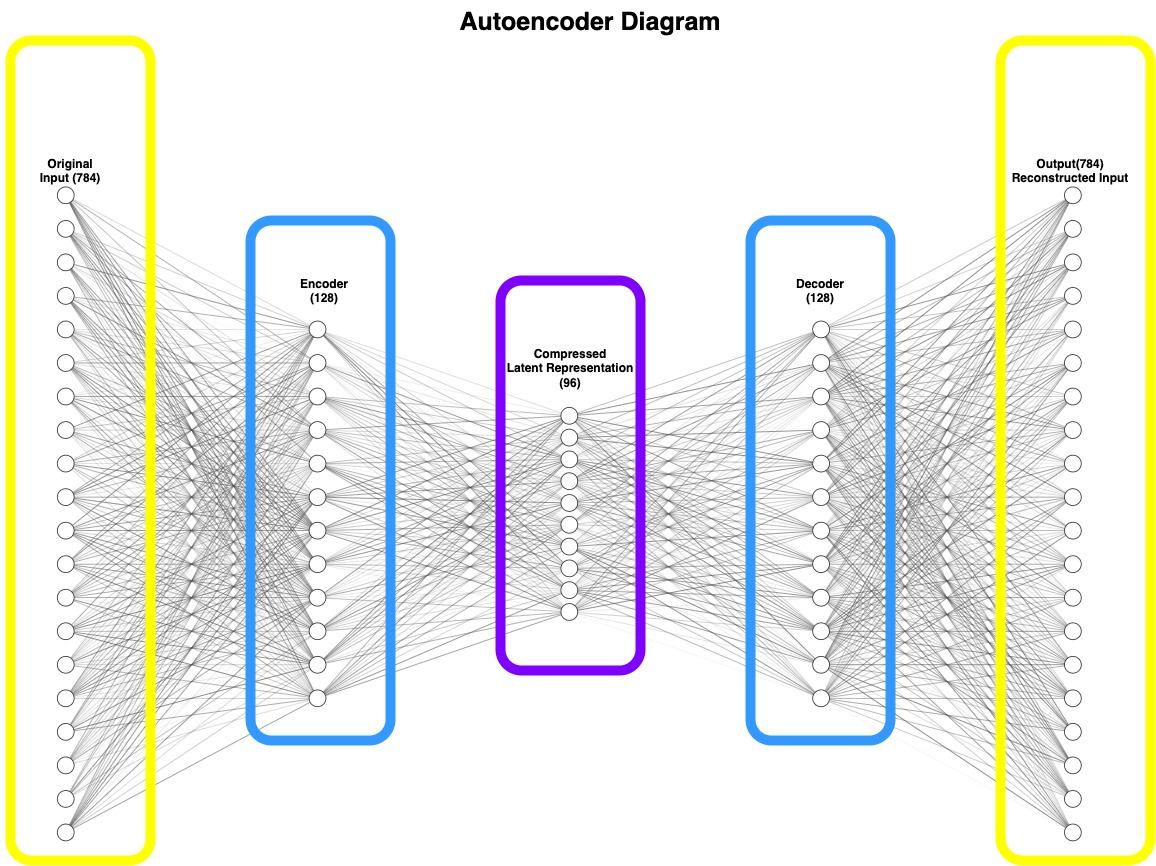

![](https://drive.google.com/open?id=1ymZ19svAOaoe-JUm1YkkSPFeZ8VG9p8s)

In [ ]:
import numpy as np
def salt_and_pepper(input, noise_level=0.5):
    """
    This applies salt and pepper noise to the input tensor - randomly setting bits to 1 or 0.
    Parameters
    ----------
    input : tensor
        The tensor to apply salt and pepper noise to.
    noise_level : float
        The amount of salt and pepper noise to add.
    Returns
    -------
    tensor
        Tensor with salt and pepper noise applied.
    """
    # salt and pepper noise
    a = np.random.binomial(size=input.shape, n=1, p=(1 - noise_level))
    b = np.random.binomial(size=input.shape, n=1, p=0.5)
    c = (a==0) * b
    return input * a + c


#data preparation
flattened_x_train = x_train.reshape(-1,784)
flattened_x_train_seasoned = salt_and_pepper(flattened_x_train, noise_level=0.4)

flattened_x_test = x_test.reshape(-1,784)
flattened_x_test_seasoneed = salt_and_pepper(flattened_x_test, noise_level=0.4)

In [ ]:

latent_dim = 96  

input_image = keras.Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_image)
encoded = Dense(latent_dim, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = keras.Model(input_image, decoded)
encoder_only = keras.Model(input_image, encoded)

encoded_input = keras.Input(shape=(latent_dim,))
decoder_layer = Sequential(autoencoder.layers[-2:])
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
fit_info_AE = autoencoder.fit(flattened_x_train_seasoned, flattened_x_train,
                epochs=32,
                batch_size=64,
                shuffle=True,
                validation_data=(flattened_x_test_seasoneed, flattened_x_test))


Epoch 1/32
938/938 [==============================] - 8s 8ms/step - loss: 0.1926 - val_loss: 0.1537
Epoch 2/32
938/938 [==============================] - 7s 8ms/step - loss: 0.1466 - val_loss: 0.1395
Epoch 3/32
938/938 [==============================] - 8s 9ms/step - loss: 0.1368 - val_loss: 0.1333
Epoch 4/32
938/938 [==============================] - 7s 7ms/step - loss: 0.1319 - val_loss: 0.1302
Epoch 5/32
938/938 [==============================] - 6s 7ms/step - loss: 0.1287 - val_loss: 0.1280
Epoch 6/32
938/938 [==============================] - 7s 8ms/step - loss: 0.1265 - val_loss: 0.1263
Epoch 7/32
938/938 [==============================] - 7s 7ms/step - loss: 0.1248 - val_loss: 0.1260
Epoch 8/32
938/938 [==============================] - 7s 7ms/step - loss: 0.1236 - val_loss: 0.1243
Epoch 9/32
938/938 [==============================] - 7s 7ms/step - loss: 0.1226 - val_loss: 0.1237
Epoch 10/32
938/938 [==============================] - 6s 7ms/step - loss: 0.1217 - val_loss: 0.1231

#B

Add increasing levels of noise to the test-set using the salt_and_pepper()-function (0 to 1). 
Use matplotlib to visualize a few examples (3-4) in the original, “seasoned” (noisy), and denoised versions (Hint: for visualization use imshow(), use the trained autoencoder to denoise the noisy digits). At what noise level does it become difficult to identify the digits for you? At what noise level does the denoising stop working? 

Noise: 0.0


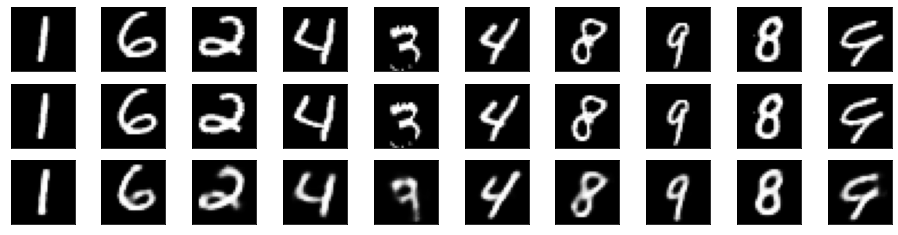

Noise: 0.25


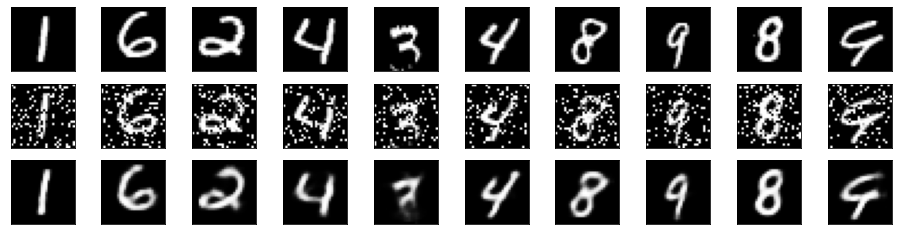

Noise: 0.5


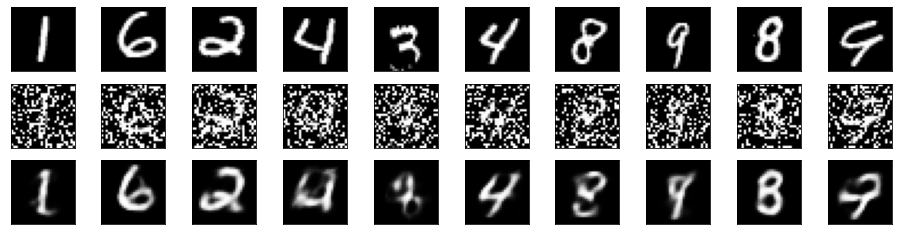

Noise: 0.75


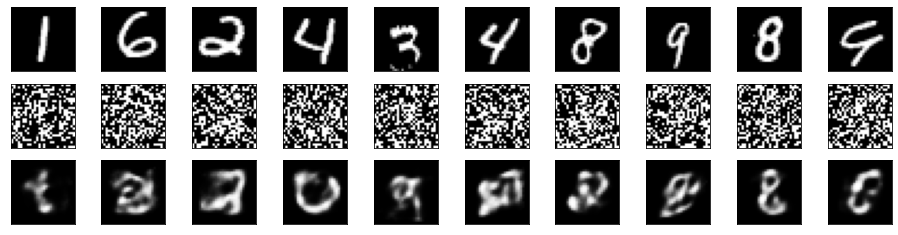

Noise: 1.0


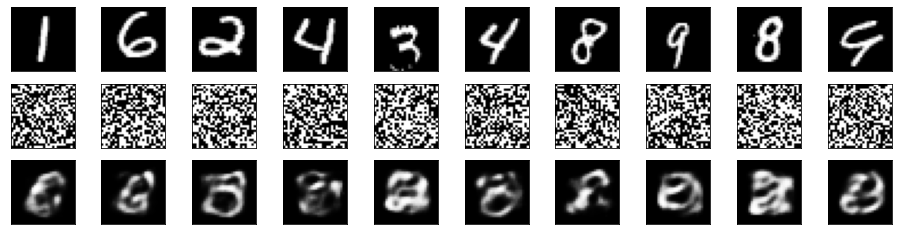

In [ ]:
import numpy as np
import random

num_images = 10
np.random.seed(42)
noises = np.linspace(0, 1, 5)

random_test_images = np.random.randint(x_test.shape[0], size=num_images)

for i in range(len(noises)): 
 encoded_imgs = salt_and_pepper(flattened_x_test, noises[i])
 decoded_imgs = autoencoder.predict(encoded_imgs)
 
 num_digits = 4
 plt.figure(figsize=(16, 4))
 print("Noise: " + str(noises[i]))

 for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(x_test[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # plot encoded image (seasoned)
    ax = plt.subplot(3, num_images, num_images + i + 1)
    plt.imshow(encoded_imgs[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # plot denoised image
    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(decoded_imgs[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
 plt.show()

At noise level 0.75, it becomes a bit hard to identify what an image represents the correct digit. Also, the autoencoder doesn't look is useful at the noise level of 0.75 or above. In this sense, it seems denoising stopped working after 0.75. 




#C) 
Test whether denoising improves the classification with the best performing model you obtained in questions 2 or 3. Plot the true-positive rate as a function of noise-level for the seasoned and 
denoised datasets – assume that the correct classification is the most likely class-label. Discuss your 
results.   

In [ ]:
#Load the best model from Problem 3 
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Conv2D(64,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizer))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer=tensorflow.keras.optimizers.SGD(learning_rate=0.1),
    metrics=["accuracy"],
)

fit = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=40,
    verbose=0,
    validation_data=(x_test, y_test),
    
)

noises = np.linspace(0,1,15) # 15 iterations 0 - 1 

scores_denoised = []
scores_seasoned = []
for i in range (len(noises)):
    print("Iteration:", i)


    flattened_x_test_seasoneed = salt_and_pepper(flattened_x_test, noises[i])
    decoded_imgs = autoencoder.predict(flattened_x_test_seasoneed)

    decoded_imgs_reshaped = decoded_imgs.reshape(len(decoded_imgs), 28, 28, 1)
    x_test_seasoneed = flattened_x_test_seasoneed.reshape(len(flattened_x_test_seasoneed), 28, 28, 1)

    scores_denoised.append(model.evaluate(decoded_imgs_reshaped, y_test, verbose=0)[1])
    scores_seasoned.append(model.evaluate(x_test_seasoneed, y_test, verbose=0)[1])

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14


[0.9460999965667725, 0.9460999965667725, 0.9469000101089478, 0.9423999786376953, 0.9422000050544739, 0.9257000088691711, 0.9060999751091003, 0.8547999858856201, 0.7675999999046326, 0.6355999708175659, 0.47589999437332153, 0.3359000086784363, 0.21559999883174896, 0.13729999959468842, 0.10029999911785126]
[0.9865999817848206, 0.973800003528595, 0.944100022315979, 0.8895000219345093, 0.8120999932289124, 0.7038000226020813, 0.5763000249862671, 0.4415000081062317, 0.32019999623298645, 0.2320999950170517, 0.1655000001192093, 0.1306000053882599, 0.10939999669790268, 0.1031000018119812, 0.09790000319480896]


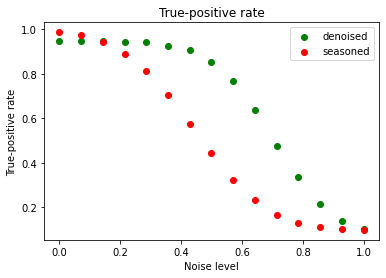

In [ ]:
print(scores_denoised)
print(scores_seasoned)
plt.scatter(noises, scores_denoised, color='green', label = 'denoised')
plt.scatter(noises, scores_seasoned, color='red', label = 'seasoned')
plt.xlabel("Noise level")
plt.ylabel("True-positive rate")
plt.title("True-positive rate")
plt.legend()
plt.show()

The true-positive rate as a function of noise level for the seasoned and denoised datasets shows that the rate is quite high(above 0.5) when a noise level is below 0.4 on the other hand, when a noise level reaches 0.75, the function decline steeply. The result is the same as what we discussed in the previous question 4B). At the noise level of 0.75, even the human eye cannot classify which digit the image represents.  
If we compare the rate of denoised and seasoned images, at the noise level between 0.2 and 0.8, the rate of seasoned images is significantly lower. The result clearly shows the function of autoencoders that remove noise and increase accuracy.  
If the autoencoder is not used, but the images with added noise are directly evaluated by the model, the TPR is significantly lower - especially in the interval 0.2 to 0.8. This shows that autoencoders can be of great use to remove noise and give a more correct evaluation of images.
What is interesting though, at the very low noise level, the seasoned images show a slightly higher rate. We can guess the reason is that the autoencoder tries to remove noise when there is no noise in the images. It may decrease overall accuracy.  


#D) 
Explain how you can use the decoder part of the denoising auto-encoder to generate synthetic “hand-written” digits? – Describe the procedure and show examples in your report. 

The decoder part of the denoising auto-encoder can be used to generate synthetic “hand-written” digits by making it decode images with random noise. 
As described in the 4A), the features of compressed images are stored in the latent space. Using interpolation of this latent space, a new image is created which looks hand-written. Interploration makes a unique image by changing the vector of a few features. When the decoder reconstructs the image from the latent space with a few tweaked features.   
We can simply add a few noises to the images and then run them through the autoencoder. Autoencoder generates different digits from the original images which are perfect digits. These generated images look like hand-written digits because each digit is slightly different from the others. Here are examples.


source: https://medium.com/@noufalsamsudin/latent-space-interpolation-of-images-using-keras-and-tensorflow-js-7e35bec01c5a

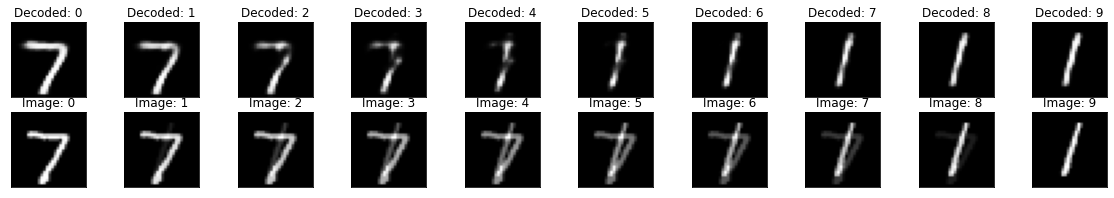

In [ ]:
def interpolate_points(p1, p2, n_steps=10):
	# interpolate ratios between the points
	ratios = np.linspace(0, 1, num=n_steps)
	# linear interpolate vectors
	vectors = list()
	for ratio in ratios:
		v = (1.0 - ratio) * p1 + ratio * p2
		vectors.append(v)
	return np.asarray(vectors)
 
test_image1=x_test[0].reshape(-1,784)
test_image2=x_test[2].reshape(-1,784)
encoded_img1=encoder_only.predict(test_image1)
encoded_img2=encoder_only.predict(test_image2)

#Create the interpolated images
interpolated_images=interpolate_points(encoded_img1.flatten(),encoded_img2.flatten())
interpolated_orig_images=interpolate_points(test_image1.flatten(),test_image2.flatten())

interpolated_images.shape

num_images = 10
np.random.seed(42)
plt.figure(figsize=(20, 8))

for i, image_idx in enumerate(interpolated_images):
        
    ax = plt.subplot(5, num_images,num_images+ i + 1)
    plt.imshow(decoder.predict(interpolated_images[i].reshape(1,96)).reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title("Decoded: {}".format(i))
    
    ax = plt.subplot(5, num_images,2*num_images+ i + 1)
    plt.imshow(interpolated_orig_images[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title("Image: {}".format(i))

plt.show()